In [1]:
# Wymagane biblioteki
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

print("Biblioteki załadowane!")

Biblioteki załadowane!


In [2]:
# ============================================================
# SZCZEGÓŁOWE WYJAŚNIENIE FUNKCJI SOFTMAX
# ============================================================
# Softmax przekształca wektor dowolnych wartości (logits) 
# w rozkład prawdopodobieństwa (wartości od 0 do 1, sumujące się do 1)
#
# Wzór matematyczny:
#   softmax(x_i) = exp(x_i) / Σ exp(x_j)
#
# Gdzie:
#   - exp(x_i) to e^x_i (funkcja wykładnicza)
#   - Σ exp(x_j) to suma exp dla wszystkich elementów
# ============================================================

# PRZYKŁAD 1: Prosty wektor logits
print("=" * 60)
print("KROK PO KROKU: JAK DZIAŁA SOFTMAX")
print("=" * 60)

# Przykładowe logits (surowe wyniki modelu)
logits_example = torch.tensor([2.0, 1.0, 0.1])
print(f"\n1. Logits (surowe wartości): {logits_example.numpy()}")

# KROK 1: Oblicz exp() dla każdego elementu
exp_values = torch.exp(logits_example)
print(f"\n2. Po zastosowaniu exp():")
print(f"   exp(2.0) = {np.exp(2.0):.4f}")
print(f"   exp(1.0) = {np.exp(1.0):.4f}")
print(f"   exp(0.1) = {np.exp(0.1):.4f}")
print(f"   Wynik: {exp_values.numpy()}")

# KROK 2: Oblicz sumę wszystkich exp()
sum_exp = torch.sum(exp_values)
print(f"\n3. Suma wszystkich exp(): {sum_exp.item():.4f}")

# KROK 3: Podziel każdy exp() przez sumę
softmax_manual = exp_values / sum_exp
print(f"\n4. Softmax (ręcznie obliczony):")
print(f"   {exp_values[0]:.4f} / {sum_exp:.4f} = {softmax_manual[0]:.4f}")
print(f"   {exp_values[1]:.4f} / {sum_exp:.4f} = {softmax_manual[1]:.4f}")
print(f"   {exp_values[2]:.4f} / {sum_exp:.4f} = {softmax_manual[2]:.4f}")

# Weryfikacja z PyTorch
softmax_pytorch = F.softmax(logits_example, dim=-1)
print(f"\n5. Softmax (PyTorch): {softmax_pytorch.numpy()}")

# Sprawdzenie czy suma = 1
print(f"\n6. Suma prawdopodobieństw: {softmax_pytorch.sum().item():.6f} (powinna być 1.0)")

KROK PO KROKU: JAK DZIAŁA SOFTMAX

1. Logits (surowe wartości): [2.  1.  0.1]

2. Po zastosowaniu exp():
   exp(2.0) = 7.3891
   exp(1.0) = 2.7183
   exp(0.1) = 1.1052
   Wynik: [7.389056  2.7182817 1.105171 ]

3. Suma wszystkich exp(): 11.2125

4. Softmax (ręcznie obliczony):
   7.3891 / 11.2125 = 0.6590
   2.7183 / 11.2125 = 0.2424
   1.1052 / 11.2125 = 0.0986

5. Softmax (PyTorch): [0.6590012  0.24243298 0.09856589]

6. Suma prawdopodobieństw: 1.000000 (powinna być 1.0)


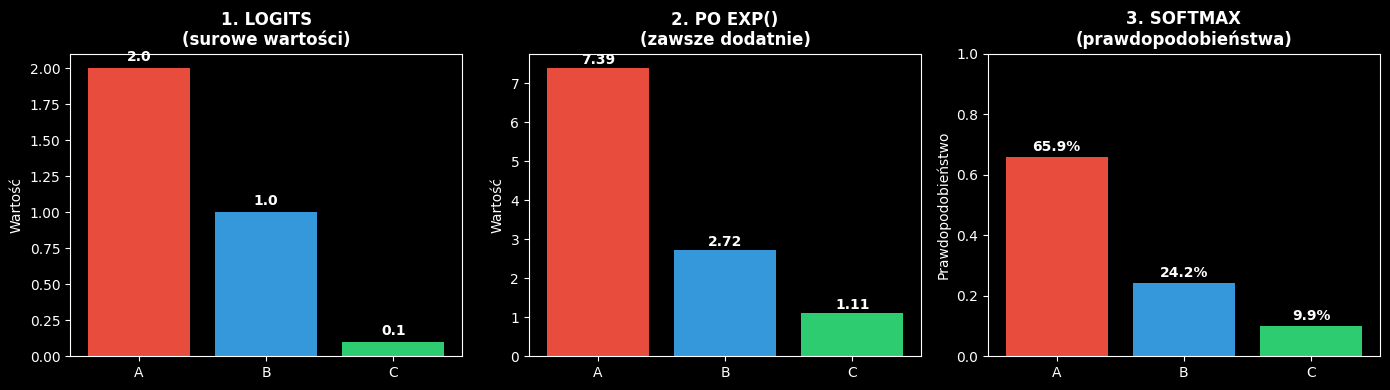

In [3]:
# ============================================================
# WIZUALIZACJA: Porównanie logits vs softmax
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Wykres 1: Logits (surowe wartości)
axes[0].bar(['A', 'B', 'C'], logits_example.numpy(), color=['#e74c3c', '#3498db', '#2ecc71'])
axes[0].set_title('1. LOGITS\n(surowe wartości)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Wartość')
for i, v in enumerate(logits_example.numpy()):
    axes[0].text(i, v + 0.05, f'{v:.1f}', ha='center', fontweight='bold')

# Wykres 2: Po exp()
axes[1].bar(['A', 'B', 'C'], exp_values.numpy(), color=['#e74c3c', '#3498db', '#2ecc71'])
axes[1].set_title('2. PO EXP()\n(zawsze dodatnie)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Wartość')
for i, v in enumerate(exp_values.numpy()):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Wykres 3: Softmax (prawdopodobieństwa)
axes[2].bar(['A', 'B', 'C'], softmax_pytorch.numpy(), color=['#e74c3c', '#3498db', '#2ecc71'])
axes[2].set_title('3. SOFTMAX\n(prawdopodobieństwa)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Prawdopodobieństwo')
axes[2].set_ylim(0, 1)
for i, v in enumerate(softmax_pytorch.numpy()):
    axes[2].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

TEMPERATURA W SOFTMAX
Temperatura kontroluje 'ostrość' rozkładu:
  - T < 1: Bardziej pewny (większe różnice)
  - T = 1: Standardowy softmax
  - T > 1: Bardziej niepewny (mniejsze różnice)


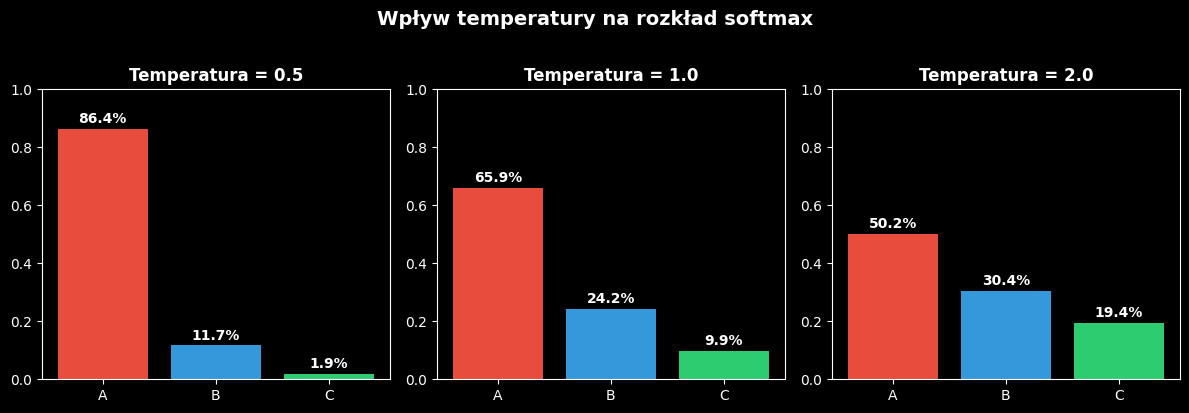

In [4]:
# ============================================================
# PRZYKŁAD 2: Wpływ temperatury na softmax
# ============================================================
print("=" * 60)
print("TEMPERATURA W SOFTMAX")
print("=" * 60)
print("Temperatura kontroluje 'ostrość' rozkładu:")
print("  - T < 1: Bardziej pewny (większe różnice)")
print("  - T = 1: Standardowy softmax")
print("  - T > 1: Bardziej niepewny (mniejsze różnice)")

def softmax_with_temp(logits, temperature):
    return F.softmax(logits / temperature, dim=-1)

temperatures = [0.5, 1.0, 2.0]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, temp in zip(axes, temperatures):
    probs = softmax_with_temp(logits_example, temp)
    ax.bar(['A', 'B', 'C'], probs.numpy(), color=['#e74c3c', '#3498db', '#2ecc71'])
    ax.set_title(f'Temperatura = {temp}', fontsize=12, fontweight='bold')
    ax.set_ylim(0, 1)
    for i, v in enumerate(probs.numpy()):
        ax.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

plt.suptitle('Wpływ temperatury na rozkład softmax', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()